# Initial plotting of data to be modeled

Lysozyme dilute breakthrough on SP Sepharose FF, 2.0 ml column, 0.5 cm ID

Breakthrough data for 20% B, replicate 2

In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
from IPython.core.display import display, HTML, clear_output
display(HTML("<style>.container { width:100% !important; }</style>"))
from pathlib import Path

import pandas as pd
import numpy as np
import numpy.polynomial.polynomial as poly
import scipy
from scipy import integrate
import math
import matplotlib.pyplot as plt
import os

import analysis_functions.plot_chromatogram as my_plot

Create directory for images, if nonexistent

In [15]:
image_directory = './images/'
try:
    os.mkdir(image_directory)
except:
    pass

## Lyszome dilute breakthrough, 20% B, rep 2

In [106]:
directory = './data/randomized_data_20_B_rep_2/'
files = os.listdir(directory)
files

['CH 2021 04 04 lysozyme dilute breakthrough 20 B rep 2004.xls',
 'CH 2021 04 04 lysozyme dilute breakthrough 20 B rep 2003.xls',
 'CH 2021 04 04 lysozyme dilute breakthrough 20 B rep 2001.xls',
 'CH 2021 04 04 lysozyme dilute breakthrough 20 B rep 2002.xls',
 'CH 2021 04 04 lysozyme dilute breakthrough 20 B rep 2005.xls']

In [107]:
my_data = {}
for i, f in enumerate(files):
    my_data[f] = my_plot.data(directory, f)

    if i == 0 or i == 2: # determined by looking at data files
        flow_ind = 6000
    else:
        flow_ind = 3000    
    
    my_data[f].add_velocity_and_cv(v_col=2.0, d_col=0.5, flow_ind=flow_ind)

In [108]:
# for i, f in enumerate(files):
#     print(int(my_data[f].velocity))

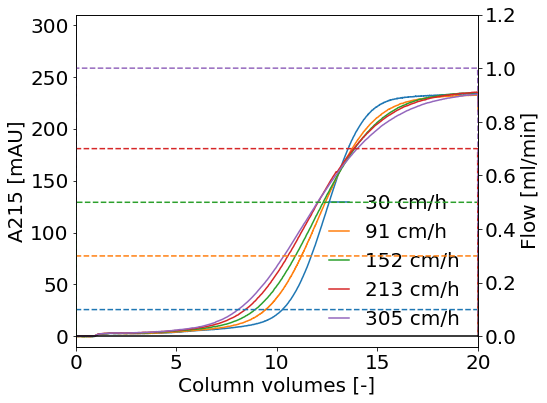

In [109]:
fig, ax = plt.subplots()
font    = {'weight' : 'normal', 'size'   : 20}
plt.rc('font', **font)
fig.set_size_inches(8, 6, forward=True)
ax.set_xlabel('Column volumes [-]')
ax.set_ylabel('A215 [mAU]')
ax2 = ax.twinx()
ax2.set_ylabel('Flow [ml/min]')

for v in velocities:
    for f in files:
        if my_data[f].velocity == v:
            df = my_data[f].df
            inject_cv = [x for x in df['Inject_cv'] if str(x) != 'nan']
            ax.plot(df['UV1_215nm_cv'] - inject_cv[-1], df['UV1_215nm_mAU'], label=f'{int(my_data[f].velocity)} cm/h')
            ax2.plot(df['P960_Flow_cv'] - inject_cv[-1], df['P960_Flow_ml/min'], '--')

ax.legend(loc='lower right', frameon=False, handlelength=1)
ax.set_xlim(0, 20)
ax.set_ylim(-10, 300)
ax2.set_ylim(0, 1.2)

my_plot.align_yaxis_multiple([ax, ax2])

fig.patch.set_alpha(1.0)
plt.tight_layout()

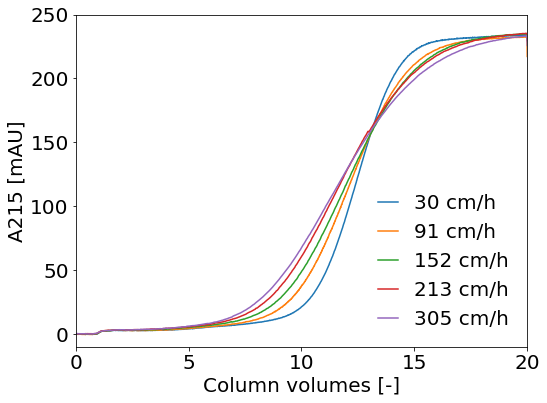

In [110]:
fig, ax = plt.subplots()
font    = {'weight' : 'normal', 'size'   : 20}
plt.rc('font', **font)
fig.set_size_inches(8, 6, forward=True)
ax.set_xlabel('Column volumes [-]')
ax.set_ylabel('A215 [mAU]')

for v in velocities:
    for f in files:
        if my_data[f].velocity == v:
            df = my_data[f].df
            inject_cv = [x for x in df['Inject_cv'] if str(x) != 'nan']
            ax.plot(df['UV1_215nm_cv'] - inject_cv[-1], df['UV1_215nm_mAU'], label=f'{int(my_data[f].velocity)} cm/h')

ax.legend(loc='lower right', frameon=False, handlelength=1)
ax.set_xlim(0, 20)
ax.set_ylim(-10, 250)

fig.patch.set_alpha(1.0)
plt.tight_layout()
fig.savefig('./images/20_B_randomized_study_rep_2.png', dpi=300)

## Noise measurement

In [111]:
directory = './data/data_lysozyme_noise_measure/'
files = os.listdir(directory)    
files

['CH 2021 04 06 lys dilute breakthrough 20 B error measurement003.xls',
 'CH 2021 04 06 lys dilute breakthrough 20 B error measurement001.xls',
 'CH 2021 04 06 lys dilute breakthrough 20 B error measurement002.xls']

In [112]:
for f in files:
    my_data[f] = my_plot.data(directory, f)
    my_data[f].add_velocity_and_cv(v_col=2.0, d_col=0.5, flow_ind=3000)

In [113]:
# for i, f in enumerate(files):
#     print(int(my_data[f].velocity))

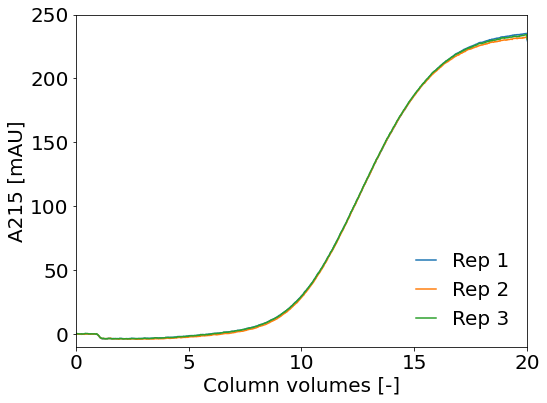

In [114]:
fig, ax = plt.subplots()
font    = {'weight' : 'normal', 'size'   : 20}
plt.rc('font', **font)
fig.set_size_inches(8, 6, forward=True)
ax.set_xlabel('Column volumes [-]')
ax.set_ylabel('A215 [mAU]')

for i, f in enumerate(files):
    df = my_data[f].df
    inject_cv = [x for x in df['Inject_cv'] if str(x) != 'nan']
    ax.plot(df['UV1_215nm_cv'] - inject_cv[-1], df['UV1_215nm_mAU'], label=f'Rep {i+1}')

ax.legend(loc='lower right', frameon=False, handlelength=1)
ax.set_xlim(0, 20)
ax.set_ylim(-10, 250)

fig.patch.set_alpha(1.0)
plt.tight_layout()
fig.savefig('./images/noise_measurement.png', dpi=300)

# Blue dextran pulses

In [115]:
directory = './data/data_blue_dextran_on_column/'
files = os.listdir(directory)    
files

['CH 2021 04 16 blue dextran sp seph ff 1b.xls',
 'CH 2021 04 16 blue dextran sp seph ff 1a.xls',
 'CH 2021 04 16 blue dextran sp seph ff 1c.xls']

In [116]:
for f in files:
    my_data[f] = my_plot.data(directory, f)
    my_data[f].add_velocity_and_cv(v_col=2.0, d_col=0.5, flow_ind=500)

In [117]:
# for i, f in enumerate(files):
#     print(int(my_data[f].velocity))

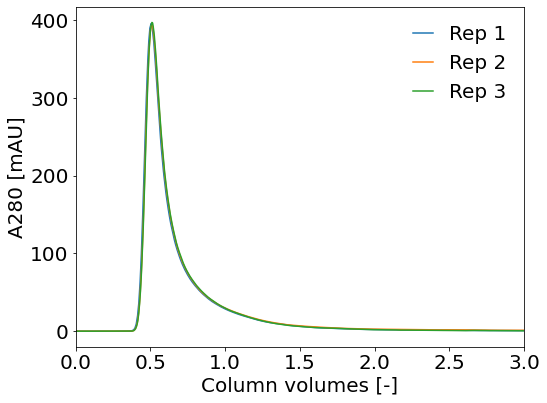

In [118]:
fig, ax = plt.subplots()
font    = {'weight' : 'normal', 'size'   : 20}
plt.rc('font', **font)
fig.set_size_inches(8, 6, forward=True)
ax.set_xlabel('Column volumes [-]')
ax.set_ylabel('A280 [mAU]')

for i, f in enumerate(files):
    df = my_data[f].df
    ax.plot(df.UV2_280nm_cv, df.UV2_280nm_mAU, label=f'Rep {i+1}')

ax.set_xlim(0, 3)
ax.legend(loc='best', frameon=False, handlelength=1)
fig.patch.set_alpha(1.0)
plt.tight_layout()
fig.savefig('./images/blue_dextran.png', dpi=300)

# Lysozyme on column
At 100% B

In [86]:
rep_dict = {"a":1, "b":2, "c":3}

for i, f in enumerate(files):    
    letter = f[f.find('.')-1]
    print(letter, rep_dict[letter])

b 2
c 3
a 1
a 1
b 2
c 3


In [119]:
directory = './data/data_lysozyme_on_column/'
files = os.listdir(directory)    
files.sort()
files

['CH 2021 04 16 lysozyme sp seph ff 1a.xls',
 'CH 2021 04 16 lysozyme sp seph ff 1b.xls',
 'CH 2021 04 16 lysozyme sp seph ff 1c.xls',
 'CH 2021 04 16 lysozyme sp seph ff 2a.xls',
 'CH 2021 04 16 lysozyme sp seph ff 2b.xls',
 'CH 2021 04 16 lysozyme sp seph ff 2c.xls']

In [120]:
for f in files:
    my_data[f] = my_plot.data(directory, f)
    my_data[f].add_velocity_and_cv(v_col=2.0, d_col=0.5, flow_ind=500)

In [85]:
# for i, f in enumerate(files):
#     print(int(my_data[f].velocity))

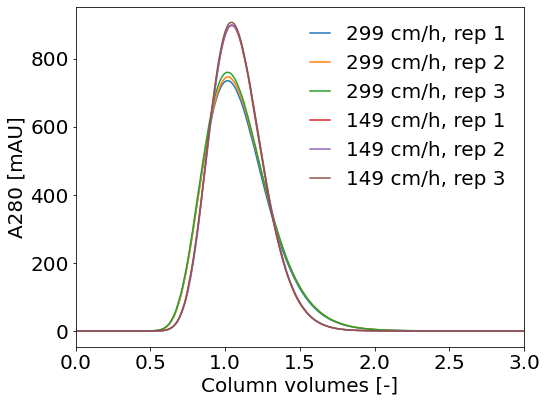

In [121]:
fig, ax = plt.subplots()
font    = {'weight' : 'normal', 'size'   : 20}
plt.rc('font', **font)
fig.set_size_inches(8, 6, forward=True)
ax.set_xlabel('Column volumes [-]')
ax.set_ylabel('A280 [mAU]')

for i, f in enumerate(files):    
    df = my_data[f].df
    letter = f[f.find('.')-1]
    rep_num = rep_dict[letter]
    label = f"{int(my_data[f].velocity)} cm/h, rep {rep_num}"
    
    ax.plot(df.UV2_280nm_cv, df.UV2_280nm_mAU, label=label)

ax.set_xlim(0, 3)
ax.legend(loc='best', frameon=False, handlelength=1)
fig.patch.set_alpha(1.0)
plt.tight_layout()
fig.savefig('./images/lysozyme_pulse_on_column_100_B.png', dpi=300)

# Lysozyme bypass
Also at 100% B

In [122]:
directory = './data/data_lysozyme_bypass/'
files = os.listdir(directory)    
files.sort()
files

['CH 2021 04 16 lysozyme bypass 1a.xls',
 'CH 2021 04 16 lysozyme bypass 1b.xls',
 'CH 2021 04 16 lysozyme bypass 1c.xls',
 'CH 2021 04 16 lysozyme bypass 2a.xls',
 'CH 2021 04 16 lysozyme bypass 2b.xls',
 'CH 2021 04 16 lysozyme bypass 2c.xls']

In [123]:
for f in files:
    my_data[f] = my_plot.data(directory, f)
    my_data[f].add_velocity_and_cv(v_col=2.0, d_col=0.5, flow_ind=500)

In [124]:
# for i, f in enumerate(files):
#     print(int(my_data[f].velocity))

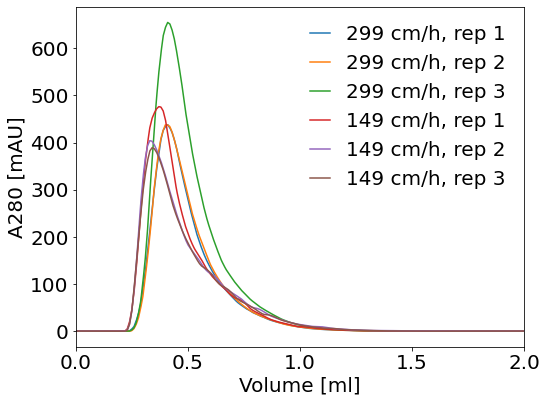

In [125]:
fig, ax = plt.subplots()
font    = {'weight' : 'normal', 'size'   : 20}
plt.rc('font', **font)
fig.set_size_inches(8, 6, forward=True)
ax.set_xlabel('Volume [ml]')
ax.set_ylabel('A280 [mAU]')

for i, f in enumerate(files):    
    df = my_data[f].df
    letter = f[f.find('.')-1]
    rep_num = rep_dict[letter]
    label = f"{int(my_data[f].velocity)} cm/h, rep {rep_num}"
    
    ax.plot(df.UV2_280nm_ml, df.UV2_280nm_mAU, label=label)

ax.set_xlim(0, 2)
ax.legend(loc='best', frameon=False, handlelength=1)
fig.patch.set_alpha(1.0)
plt.tight_layout()
fig.savefig('./images/lysozyme_bypass.png', dpi=300)

In [126]:
files.remove('CH 2021 04 16 lysozyme bypass 1c.xls')
files.remove('CH 2021 04 16 lysozyme bypass 2a.xls')

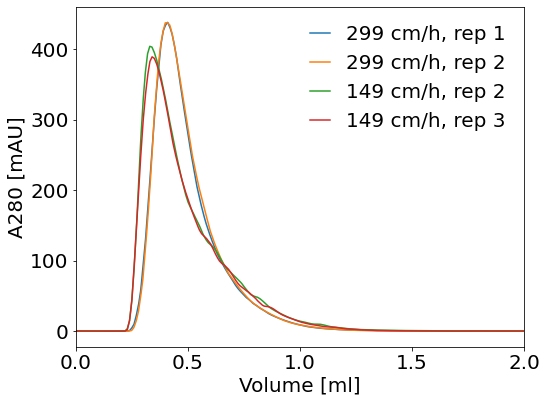

In [127]:
fig, ax = plt.subplots()
font    = {'weight' : 'normal', 'size'   : 20}
plt.rc('font', **font)
fig.set_size_inches(8, 6, forward=True)
ax.set_xlabel('Volume [ml]')
ax.set_ylabel('A280 [mAU]')

for i, f in enumerate(files):    
    df = my_data[f].df
    letter = f[f.find('.')-1]
    rep_num = rep_dict[letter]
    label = f"{int(my_data[f].velocity)} cm/h, rep {rep_num}"
    
    ax.plot(df.UV2_280nm_ml, df.UV2_280nm_mAU, label=label)

ax.set_xlim(0, 2)
ax.legend(loc='best', frameon=False, handlelength=1)
fig.patch.set_alpha(1.0)
plt.tight_layout()
fig.savefig('./images/lysozyme_bypass_inconsistent_runs_removed.png', dpi=300)

# Lysozyme breakthrough
On column at 100% B

In [128]:
directory = './data/data_lysozyme_breakthrough_100_B/'
files = os.listdir(directory)    
files.sort()
files

['CH 2021 04 16 sp seph ff flowthrough 100 B 1.xls',
 'CH 2021 04 16 sp seph ff flowthrough 100 B 2.xls']

In [129]:
for f in files:
    my_data[f] = my_plot.data(directory, f)
    my_data[f].add_velocity_and_cv(v_col=2.0, d_col=0.5, flow_ind=500)

WARNING *** file size (985384) not 512 + multiple of sector size (512)


In [130]:
# for i, f in enumerate(files):
#     print(int(my_data[f].velocity))

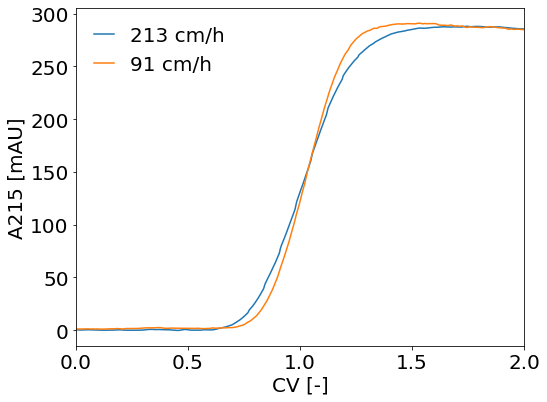

In [131]:
fig, ax = plt.subplots()
font    = {'weight' : 'normal', 'size'   : 20}
plt.rc('font', **font)
fig.set_size_inches(8, 6, forward=True)
ax.set_xlabel('CV [-]')
ax.set_ylabel('A215 [mAU]')

for i, f in enumerate(files):    
    df = my_data[f].df    
    ax.plot(df.UV1_215nm_cv, df.UV1_215nm_mAU, label=f'{int(my_data[f].velocity)} cm/h')

ax.set_xlim(0, 2)
ax.legend(loc='best', frameon=False, handlelength=1)
fig.patch.set_alpha(1.0)
plt.tight_layout()
fig.savefig('./images/lysozyme_breakthrough_100_B.png', dpi=300)